# __IPL batsmen EDA__


### __Importin the necessary libriaries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Uploading the dataset__

In [2]:
d=pd.read_csv("C:\\Users\HARIHARAN\Downloads\IPL dataset\IPL - Player Performance Dataset\All Seasons Combined\Most Runs All Seasons Combine.csv")
d.head()

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


### __Data Cleaning__

In [3]:
d.shape

(1986, 14)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1986 non-null   int64  
 1   Player      1986 non-null   object 
 2   Mat         1986 non-null   int64  
 3   Inns        1986 non-null   int64  
 4   NO          1986 non-null   int64  
 5   Runs        1986 non-null   int64  
 6   HS          1986 non-null   object 
 7   Avg         1986 non-null   float64
 8   BF          1986 non-null   int64  
 9   SR          1986 non-null   float64
 10  100         1986 non-null   int64  
 11  50          1986 non-null   int64  
 12  4s          1986 non-null   int64  
 13  6s          1986 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 217.3+ KB


In [5]:
d.HS=d.HS.str.replace("*"," ")
d.head()

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,2,Sanath Jayasuriya,14,14,2,518,114,43.16,309,167.63,1,2,58,31
3,3,Shane Watson,15,15,5,472,76,47.20,311,151.76,0,4,47,19
4,4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [6]:
d.HS=d.HS.astype("int")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1986 non-null   int64  
 1   Player      1986 non-null   object 
 2   Mat         1986 non-null   int64  
 3   Inns        1986 non-null   int64  
 4   NO          1986 non-null   int64  
 5   Runs        1986 non-null   int64  
 6   HS          1986 non-null   int32  
 7   Avg         1986 non-null   float64
 8   BF          1986 non-null   int64  
 9   SR          1986 non-null   float64
 10  100         1986 non-null   int64  
 11  50          1986 non-null   int64  
 12  4s          1986 non-null   int64  
 13  6s          1986 non-null   int64  
dtypes: float64(2), int32(1), int64(10), object(1)
memory usage: 209.6+ KB


In [7]:
d = d.drop(columns=d.columns[0])
d.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,Sanath Jayasuriya,14,14,2,518,114,43.16,309,167.63,1,2,58,31
3,Shane Watson,15,15,5,472,76,47.20,311,151.76,0,4,47,19
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [8]:
df = d.groupby('Player').agg({
    'Mat': 'sum',
    'Inns': 'sum',
    'NO': 'sum',
    'Runs': 'sum',
    'HS': 'max',
    'Avg': 'mean',
    'BF': 'sum',
    'SR': 'mean',
    '100': 'sum',
    '50': 'sum',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

In [9]:
df.shape

(545, 13)

In [10]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,AB de Villiers,169,157,36,4697,133,37.075385,3048,147.285385,2,37,374,239
1,Aakash Chopra,7,6,0,53,24,9.700000,71,69.325000,0,0,7,0
2,Aaron Finch,87,85,7,2005,88,23.178000,1570,117.564000,0,14,204,75
3,Abdul Samad,23,18,4,222,33,17.265000,152,149.170000,0,0,12,14
4,Abdur Razzak,1,1,1,0,0,0.000000,2,0.000000,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  545 non-null    object 
 1   Mat     545 non-null    int64  
 2   Inns    545 non-null    int64  
 3   NO      545 non-null    int64  
 4   Runs    545 non-null    int64  
 5   HS      545 non-null    int32  
 6   Avg     545 non-null    float64
 7   BF      545 non-null    int64  
 8   SR      545 non-null    float64
 9   100     545 non-null    int64  
 10  50      545 non-null    int64  
 11  4s      545 non-null    int64  
 12  6s      545 non-null    int64  
dtypes: float64(2), int32(1), int64(9), object(1)
memory usage: 53.4+ KB


### __Data Visualisations__

__Players with most runs in IPL__

In [12]:
df1=df.sort_values(by=["Runs"],ascending=False)


Text(0.5, 1.0, 'Top 10 players with most runs in IPL')

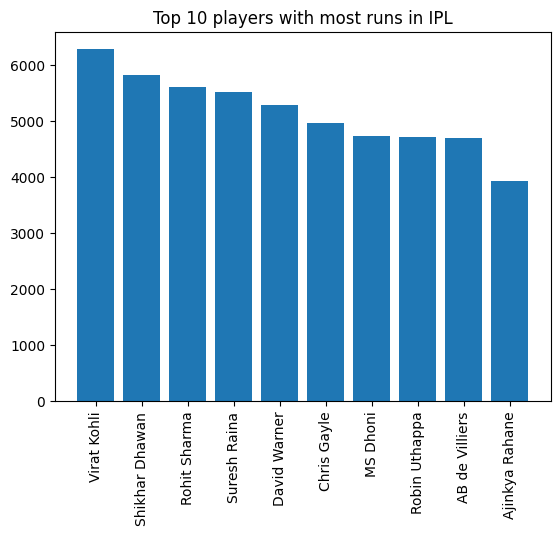

In [13]:
plt.bar(df1.Player.head(10),df1.Runs.head(10))
plt.fig=plt.xticks(rotation=90)
plt.title("Top 10 players with most runs in IPL")


__Players with the best strike rate who played more than 50 innings in IPL__

In [14]:
df2=df.sort_values(by=["SR"],ascending=False)
df2=df2[df2["Inns"]>=50]


Text(0.5, 1.0, 'Top 10 players with the best stike rate who played a minimum of 50 innings')

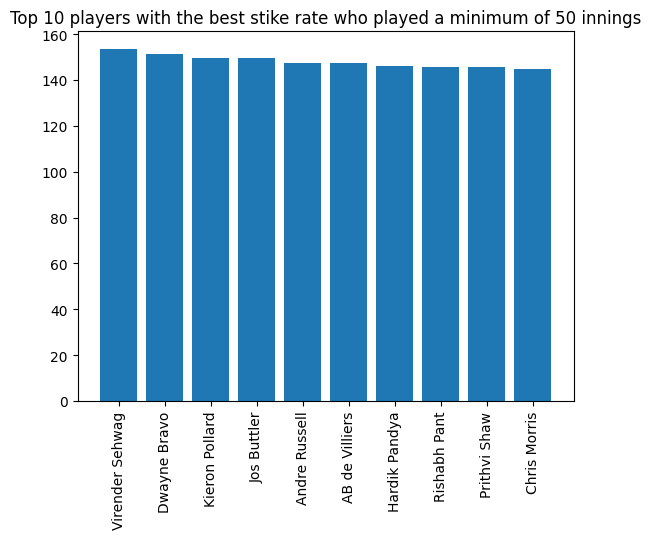

In [15]:
plt.bar(df2.Player.head(10),df2.SR.head(10))
plt.fig=plt.xticks(rotation=90)
plt.title("Top 10 players with the best stike rate who played a minimum of 50 innings")

__Players with the highest individual score in an innings__

Text(0.5, 1.0, 'Top 10 players with the highest individual score in an innings')

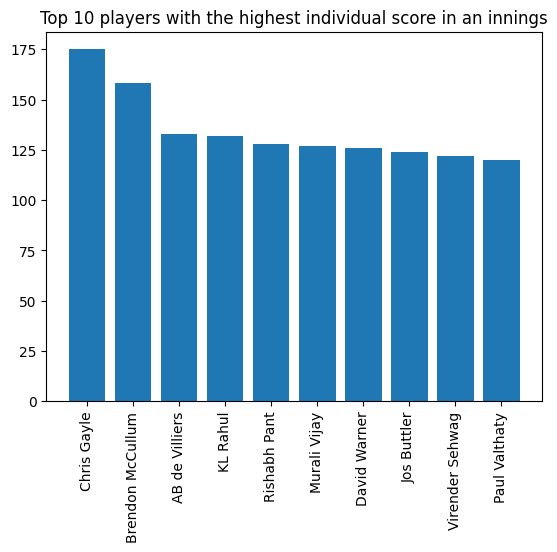

In [50]:
df3=df.sort_values(by=["HS"],ascending=False)

plt.bar(df3.Player.head(10),df3.HS.head(10))
plt.fig=plt.xticks(rotation=90)
plt.title("Top 10 players with the highest individual score in an innings")

__Players who hit the most boundaries__

In [27]:
df4=df.sort_values(by=["6s"],ascending=False)
df5=df.sort_values(by=["4s"],ascending=False)

Text(0.5, 1.0, 'Top 10 players who hit the most boundaries')

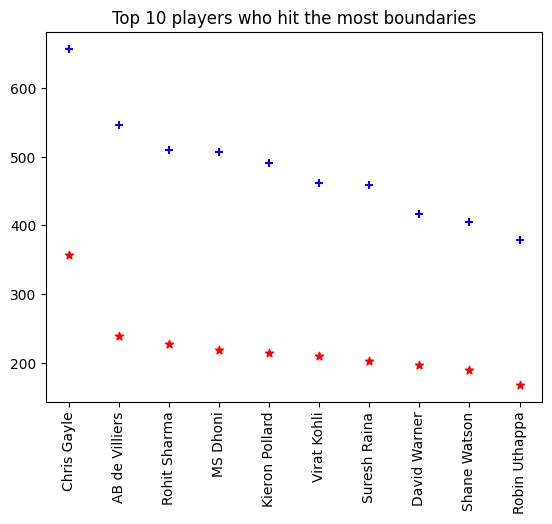

In [51]:
plt.scatter(df4.Player.head(10),df4["6s"].head(10),color="red",marker="*")
plt.scatter(df4.Player.head(10),df5["4s"].head(10),color="blue",marker="+")
plt.fig=plt.xticks(rotation=90)
plt.title("Top 10 players who hit the most boundaries")

__Players with most 50's and 100's in IPL__

In [29]:
df6=df.sort_values(by=["100"],ascending=False)
df7=df.sort_values(by=["50"],ascending=False)

Text(0.5, 1.0, "Top 10 players with most 50's and 100's in IPL")

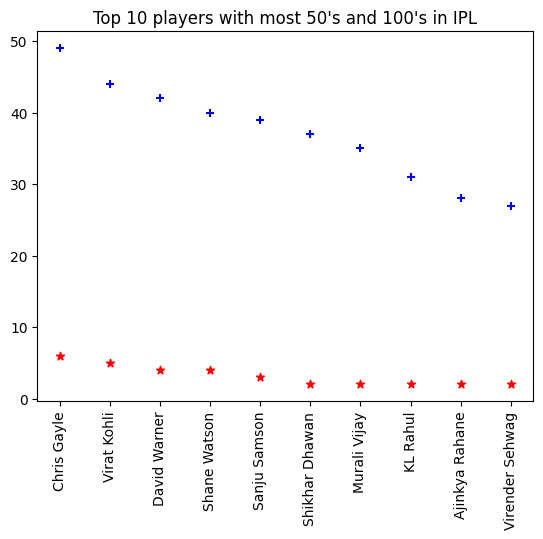

In [52]:
plt.scatter(df6.Player.head(10),df6["100"].head(10),color="red",marker="*")
plt.scatter(df6.Player.head(10),df7["50"].head(10),color="blue",marker="+")
plt.fig=plt.xticks(rotation=90)
plt.title("Top 10 players with most 50's and 100's in IPL")

__Players with the best avearge who faced a minimum of 500 balls__

Text(0.5, 1.0, 'Top 10 players with the best stike rate who played a minimum of 50 innings')

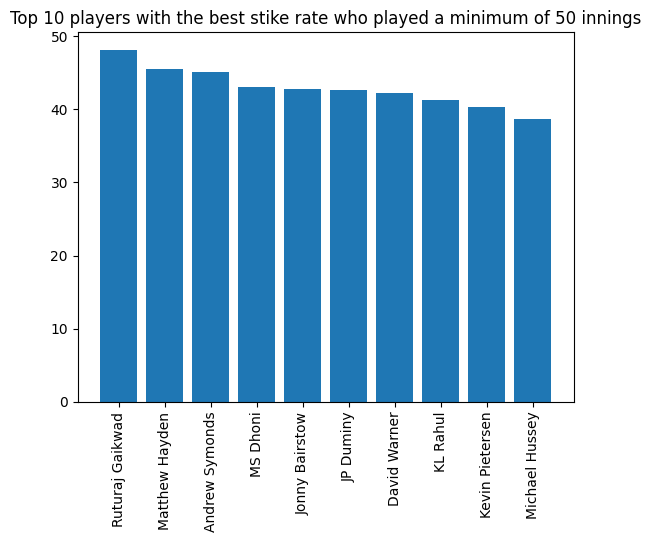

In [27]:
df8=df[df["BF"]>=500]
df9=df8.sort_values(by=["Avg"],ascending=False)
plt.bar(df9.Player.head(10),df9.Avg.head(10))
plt.fig=plt.xticks(rotation=90)
plt.title("Top 10 players with the best Average who faced a minimum of 500 balls")